In [29]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


In [1]:
from jetset.jet_model import Jet
my_jet=Jet(name='test',electron_distribution='lppl',)

In [2]:
Jet.available_electron_distributions()


lp: log-parabola
pl: powerlaw
lppl: log-parabola with low-energy powerlaw branch
lpep: log-parabola defined by peak energy
plc: powerlaw with cut-off
bkn: broken powerlaw
spitkov: spitkov
lppl_pile_up: log-parabola with low-energy powerlaw branch and pile-up
bkn_pile_up: broken powerlaw and pileup


In [3]:
my_jet.show_pars()


      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               N    electron_density         1 / cm3              100.0              0.0               None False  False
            gmin  low-energy-cut-off lorentz-factor*                2.0              1.0       1000000000.0 False  False
            gmax high-energy-cut-off lorentz-factor*          1000000.0              1.0 1000000000000000.0 False  False
               s   LE_spectral_slope                                2.0            -10.0               10.0 False  False
               r  spectral_curvature                                0.4            -15.0               15.0 False  False
gamma0_log_parab    turn-over-energy lorentz-factor*            10000.0              1.0       1000000000.0 False  False
               R         region_

In [4]:
my_jet.parameters.par_table


name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
str16,str19,object,float64,float64,object,bool,bool
N,electron_density,1 / cm3,100.0,0.0,None,False,False
gmin,low-energy-cut-off,lorentz-factor*,2.0,1.0,1000000000.0,False,False
gmax,high-energy-cut-off,lorentz-factor*,1000000.0,1.0,1000000000000000.0,False,False
s,LE_spectral_slope,,2.0,-10.0,10.0,False,False
r,spectral_curvature,,0.4,-15.0,15.0,False,False
gamma0_log_parab,turn-over-energy,lorentz-factor*,10000.0,1.0,1000000000.0,False,False
R,region_size,cm,5000000000000000.0,1000.0,1e+30,False,False
R_H,region_position,cm,1e+17,0.0,None,False,True
B,magnetic_field,G,0.1,0.0,None,False,False


In [5]:
my_jet.show_model()



-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: test  

electron distribution:
 type: lppl  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- -

In [6]:
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=1E15)
my_jet.set_par('N',val=1E3)

In [7]:
my_jet.parameters.B.val=0.2
my_jet.parameters.r.val=0.4

In [8]:
my_jet.show_electron_distribution()


-------------------------------------------------------------------------------------------------------------------
electron distribution:
 type: lppl  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               B      magnetic_field               G                0.2              0.0               None False  False
               N    electron_density         1 / cm3             1000.0              0.0               None False  False
               R         region_size              cm 1000000000000000.0           1000.0              1e+30 False  False
             R_H     region_position              cm              1e+17              0.0               None False  

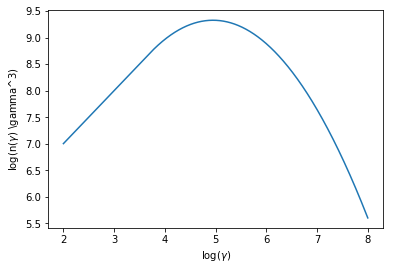

In [9]:
p=my_jet.electron_distribution.plot3p()


In [10]:
my_jet.eval()

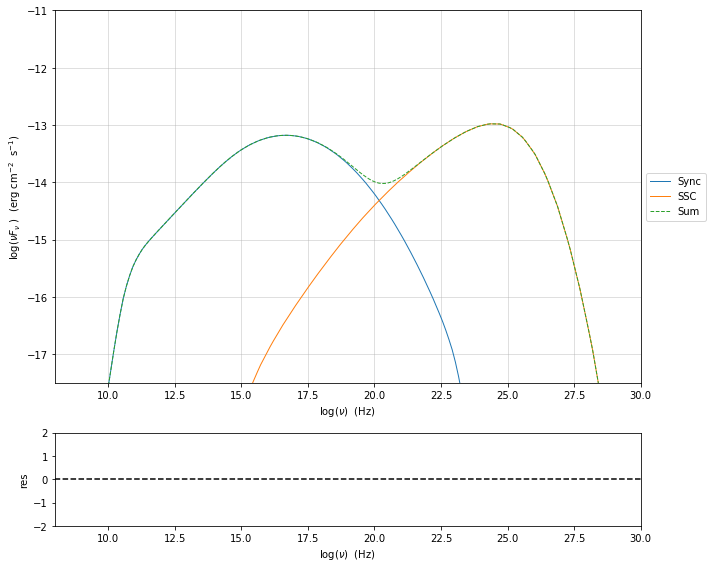

In [11]:
from jetset.plot_sedfit import PlotSED
my_plot=PlotSED()
my_jet.plot_model(plot_obj=my_plot)
my_plot.rescale(y_max=-11,y_min=-17.5,x_min=8)

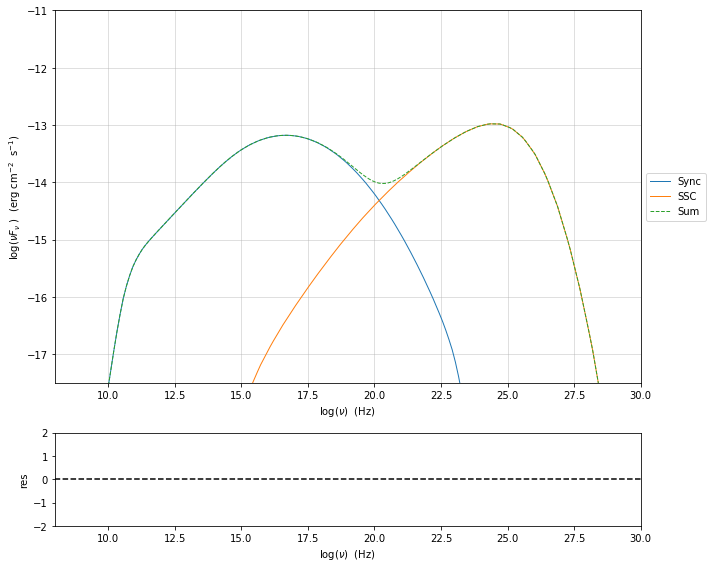

In [12]:
my_plot=my_jet.plot_model()
my_plot.rescale(y_max=-11,y_min=-17.5,x_min=8)

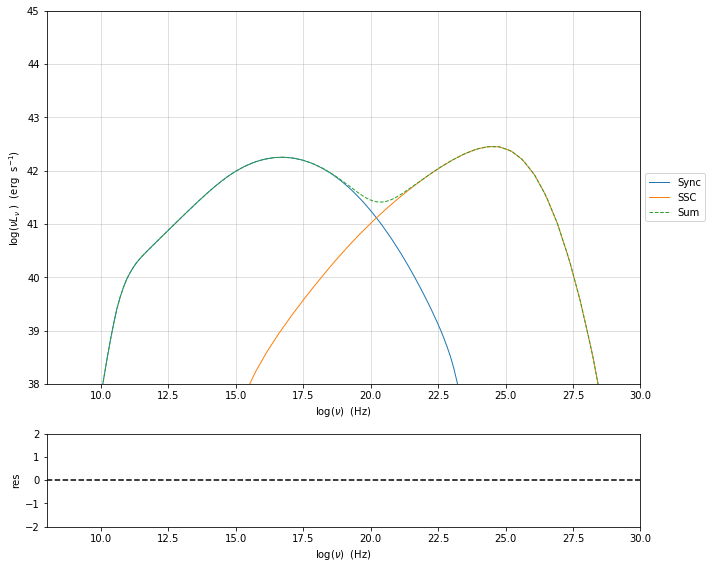

In [13]:
my_plot=my_jet.plot_model(frame='src')
my_plot.rescale(y_max=45,y_min=38,x_min=8)

In [14]:
my_jet.list_spectral_components()


Sum
Sync
SSC


In [15]:
Sync=my_jet.spectral_components.Sync


In [16]:
Sync=my_jet.get_spectral_component_by_name('Sync')


In [17]:
nu_sync=Sync.SED.nu
nuFnu_sync=Sync.SED.nuFnu

In [18]:
nu_sync_src=Sync.SED.nu_src
nuLnu_sync_src=Sync.SED.nuLnu_src

In [19]:
my_jet.spectral_components.build_table(restframe='obs')
t_obs=my_jet.spectral_components.table

In [20]:
t_obs[::10]


nu,Sum,Sync,SSC
Hz,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s)
float64,float64,float64,float64
1000000.0,1e-120,1e-120,1e-120
15848931.924611142,1.0913847465546011e-26,1.0913847465546011e-26,1e-120
251188643.1509582,4.354019758308156e-23,4.354019758308156e-23,1e-120
3981071705.5349693,1.7582250539487057e-19,1.7582250539487057e-19,1e-120
63095734448.019424,2.357912327404116e-16,2.357912327404116e-16,1e-120
1000000000000.0,1.657307440369756e-15,1.6573074369973492e-15,3.372406850854844e-24
15848931924611.11,6.499537643906031e-15,6.499536880373495e-15,7.6353253538407425e-22
251188643150958.22,2.278102349334696e-14,2.2780906693083068e-14,1.1680026389182282e-19


In [21]:
my_jet.spectral_components.build_table(restframe='src')
t_src=my_jet.spectral_components.table

In [22]:
t_obs['Sync'][::10].to('GeV/cm2 s')

<Quantity [6.24150907e-118, 6.81188780e-024, 2.71756538e-020,
           1.09739776e-016, 1.47169312e-013, 1.03440994e-012,
           4.05669184e-012, 1.42187236e-011, 3.24987905e-011,
           4.11644167e-011, 2.84125732e-011, 1.06178997e-011,
           2.13301860e-012, 2.28192530e-013, 1.12222462e-014,
           2.40571120e-020, 6.24150907e-118, 6.24150907e-118,
           6.24150907e-118, 6.24150907e-118] GeV / (cm2 s)>

In [23]:
t_src.write('test_SED.txt',format='ascii.ecsv',overwrite='True')


In [24]:
my_jet.energetic_report()


-----------------------------------------------------------------------------------------
jet eneregetic report:
     name                  type               units            val          
------------- ----------------------------- --------- ----------------------
          U_e Energy dens. blob rest. frame erg / cm3    0.49624047276102196
          U_p Energy dens. blob rest. frame erg / cm3    0.15032764260999998
          U_B Energy dens. blob rest. frame erg / cm3  0.0015915494309189538
      U_Synch Energy dens. blob rest. frame erg / cm3   0.013193073313307341
  U_Synch_DRF Energy dens. disk rest. frame erg / cm3      131.9307331330734
       U_Disk Energy dens. blob rest. frame erg / cm3                    0.0
        U_BLR Energy dens. blob rest. frame erg / cm3                    0.0
         U_DT Energy dens. blob rest. frame erg / cm3                    0.0
        U_CMB Energy dens. blob rest. frame erg / cm3                    0.0
   U_Disk_DRF Energy dens. disk rest. fr

In [25]:
my_jet.energetic_report_table


name,type,units,val
str13,str29,object,float64
U_e,Energy dens. blob rest. frame,erg / cm3,0.49624047276102196
U_p,Energy dens. blob rest. frame,erg / cm3,0.15032764260999998
U_B,Energy dens. blob rest. frame,erg / cm3,0.0015915494309189538
U_Synch,Energy dens. blob rest. frame,erg / cm3,0.013193073313307341
U_Synch_DRF,Energy dens. disk rest. frame,erg / cm3,131.9307331330734
U_Disk,Energy dens. blob rest. frame,erg / cm3,0.0
U_BLR,Energy dens. blob rest. frame,erg / cm3,0.0
U_DT,Energy dens. blob rest. frame,erg / cm3,0.0
U_CMB,Energy dens. blob rest. frame,erg / cm3,0.0


In [26]:
my_jet.save_model('test_model.dat')


In [27]:
my_jet_new=Jet.load_model('test_model.dat')


      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               R         region_size              cm 1000000000000000.0           1000.0              1e+30 False  False
             R_H     region_position              cm              1e+17              0.0               None False   True
               B      magnetic_field               G                0.2              0.0               None False  False
        beam_obj             beaming Lorentz-factor*               10.0           0.0001               None False  False
          z_cosm            redshift                                0.1              0.0               None False  False
               N    electron_density         1 / cm3             1000.0              0.0               None False  False
            gmin  low-energy-cut

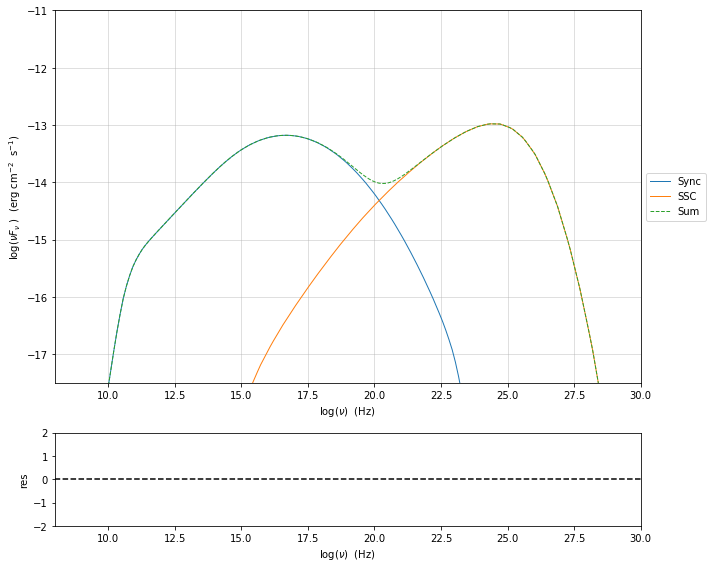

In [28]:
my_plot=my_jet_new.plot_model()
my_plot.rescale(y_max=-11,y_min=-17.5,x_min=8)